機械学習


In [1]:
from decimal import Decimal, ROUND_HALF_UP
import pandas as pd
import numpy as np

In [2]:
traffic_accident_data = pd.read_csv('new_data.csv')

In [3]:
traffic_accident_data

,accident_date,pref_name,genuine_pref_cd,genuine_pref_name,tiiki-code,ken-name,sityouson-name1,sityouson-name2,sityouson-name3,accident_type,...,降水量,気温,露点湿度,蒸気圧,湿度,風速,日照時間,全天日射量,降雪,積雪
0,2019-12-22 18:51:00,北海道(札幌方面),1,北海道,1101,北海道,札幌市,NaN,中央区,負傷,...,0.0,-1.8,-8.3,3.3,61.0,7.2,0.0,0.00,0.0,7.0
1,2019-12-31 14:50:00,北海道(札幌方面),1,北海道,1101,北海道,札幌市,NaN,中央区,負傷,...,0.0,-1.8,-8.3,3.3,61.0,7.2,0.0,0.00,0.0,7.0
2,2019-12-21 18:00:00,北海道(札幌方面),1,北海道,1101,北海道,札幌市,NaN,中央区,負傷,...,0.0,-6.1,-7.9,3.4,87.0,0.9,0.0,0.00,0.0,20.0
3,2019-12-15 08:36:00,北海道(札幌方面),1,北海道,1101,北海道,札幌市,NaN,中央区,負傷,...,0.0,-7.4,-12.3,2.4,68.0,2.2,0.0,0.00,0.0,4.0
4,2019-12-29 12:05:00,北海道(札幌方面),1,北海道,1101,北海道,札幌市,NaN,中央区,負傷,...,0.0,-4.6,-11.0,2.7,61.0,7.3,0.0,0.50,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647055,2020-10-23 18:55:00,大分,44,大分,44201,大分県,NaN,NaN,大分市,負傷,...,0.0,21.8,13.7,15.7,60.0,6.3,0.4,0.95,0.0,0.0
647056,2020-10-16 18:45:00,大分,44,大分,44201,大分県,NaN,NaN,大分市,負傷,...,0.0,20.9,13.1,15.1,61.0,9.6,0.6,1.62,0.0,0.0
647057,2020-10-23 17:55:00,大分,44,大分,44201,大分県,NaN,NaN,大分市,負傷,...,0.0,22.3,15.7,17.8,66.0,4.2,0.0,0.00,0.0,0.0
647058,2020-10-28 08:00:00,大分,44,大分,44201,大分県,NaN,NaN,大分市,負傷,...,0.0,21.7,16.9,19.2,74.0,5.6,0.0,0.00,0.0,0.0


In [22]:
traffic_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647060 entries, 0 to 647059
Data columns (total 75 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   accident_date                  647060 non-null  object 
 1   pref_name                      647060 non-null  object 
 2   genuine_pref_cd                647060 non-null  int64  
 3   genuine_pref_name              647060 non-null  object 
 4   tiiki-code                     647060 non-null  int64  
 5   ken-name                       531123 non-null  object 
 6   sityouson-name1                165450 non-null  object 
 7   sityouson-name2                0 non-null       float64
 8   sityouson-name3                531123 non-null  object 
 9   accident_type                  647060 non-null  object 
 10  road_cd_f4                     647060 non-null  int64  
 11  road_cd_l1                     647060 non-null  int64  
 12  road_type                     

In [4]:
traffic_accident_data['accident_date'].sort_values()

9924      2019-01-01 00:10:00
28702     2019-01-01 00:21:00
9584      2019-01-01 00:23:00
33994     2019-01-01 00:40:00
33247     2019-01-01 00:58:00
                 ...         
623500    2020-11-30 21:30:00
622371    2020-11-30 21:57:00
629431    2020-11-30 22:23:00
622506    2020-11-30 23:05:00
628747    2020-11-30 23:33:00
Name: accident_date, Length: 647060, dtype: object

In [6]:
traffic_accident_data.death_flag.value_counts()

0    641469
1      5591
Name: death_flag, dtype: int64

In [5]:
traffic_accident_data.shape

(647060, 75)

In [7]:
# 学習用
train_df = traffic_accident_data[(traffic_accident_data.accident_date >= "2019-01-01") &\
                                                   (traffic_accident_data.accident_date < "2020-01-01")].reset_index(drop=True)
train_df.shape

(379948, 75)

In [8]:
# テスト用
test_df = traffic_accident_data[traffic_accident_data.accident_date >= "2020-01-01"].reset_index(drop=True)
test_df.shape

(267112, 75)

In [9]:
traffic_accident_data.columns

Index(['accident_date', 'pref_name', 'genuine_pref_cd', 'genuine_pref_name',
       'tiiki-code', 'ken-name', 'sityouson-name1', 'sityouson-name2',
       'sityouson-name3', 'accident_type', 'road_cd_f4', 'road_cd_l1',
       'road_type', 'road_bypass', 'road_updown_type', 'day_night_type',
       'weather_type', 'terrain_type', 'road_condition_type',
       'road_shape_type', 'roundabout_diameter_type', 'traffic_lights_type',
       'pause_sign_type_a', 'pause_sign_type_b', 'pause_display_type_a',
       'pause_display_type_b', 'road_width_type', 'road_alignment_type',
       'zone_regulation_type', 'pedestrian_road_division_type',
       'accident_vehicle_type', 'age_type_a', 'age_type_b', 'parties_type_a',
       'parties_type_b', 'use_type_a', 'use_type_b', 'vehicle_shape_type_a',
       'vehicle_shape_type_b', 'speed_regulation_type_a',
       'speed_regulation_type_b', 'collision_site_type_a',
       'collision_site_type_b', 'damage_to_vehicle_type_a',
       'damage_to_vehicle_t

In [10]:
teacher_flag = train_df.death_flag

train_columns = ['genuine_pref_name', 'road_type', 'road_bypass', 'road_updown_type',
       'day_night_type', 'weather_type', 'terrain_type', 'road_condition_type',
       'road_shape_type', 'roundabout_diameter_type', 'traffic_lights_type',
       'pause_sign_type_a', 'pause_sign_type_b', 'pause_display_type_a',
       'pause_display_type_b', 'road_width_type', 'road_alignment_type',
       'zone_regulation_type', 'pedestrian_road_division_type',
       'accident_vehicle_type', 'age_type_a', 'age_type_b', 'parties_type_a',
       'parties_type_b', 'use_type_a', 'use_type_b', 'vehicle_shape_type_a',
       'vehicle_shape_type_b', 'speed_regulation_type_a',
       'speed_regulation_type_b', 'collision_site_type_a',
       'collision_site_type_b', 'damage_to_vehicle_type_a',
       'damage_to_vehicle_type_b', 'airbag_equipment_type_a',
       'airbag_equipment_type_b', 'side_airbag_equipment_type_a',
       'side_airbag_equipment_type_b', 'weekday_type', 'holiday_type', 'death_flag',
       '停止処分者講習実施状況', '初回更新者講習', '違反運転者講習', '一般運転者講習', '優良運転者講習', '認知機能検査受検者数',
       '高齢者講習受講者数', '臨時認知機能検査受検者数', '臨時高齢者講習受講者数', '気圧（現地）',
       '気圧（海面）', '降水量', '気温', '露点湿度', '蒸気圧', '湿度', '風速', '日照時間', '全天日射量',
       '降雪', '積雪'
                ]

train_df = train_df[train_columns]

In [11]:
# 一気にカテゴリ化
cols = train_columns[:-22]
train_df[cols] = train_df[cols].astype('category')
 
# ダミー変数を一気に作る
for each_columns in cols:
    dummy_df = pd.get_dummies( train_df[each_columns], drop_first= False)
    dummy_df.columns =  ["dummy_" + each_columns + "_" + str(i) for i in dummy_df.columns.tolist()]
    
    train_df = pd.concat([train_df,
                                     dummy_df], axis=1)

In [12]:
train_df.shape

(379948, 515)

In [13]:
list(train_df.columns)

['genuine_pref_name',
 'road_type',
 'road_bypass',
 'road_updown_type',
 'day_night_type',
 'weather_type',
 'terrain_type',
 'road_condition_type',
 'road_shape_type',
 'roundabout_diameter_type',
 'traffic_lights_type',
 'pause_sign_type_a',
 'pause_sign_type_b',
 'pause_display_type_a',
 'pause_display_type_b',
 'road_width_type',
 'road_alignment_type',
 'zone_regulation_type',
 'pedestrian_road_division_type',
 'accident_vehicle_type',
 'age_type_a',
 'age_type_b',
 'parties_type_a',
 'parties_type_b',
 'use_type_a',
 'use_type_b',
 'vehicle_shape_type_a',
 'vehicle_shape_type_b',
 'speed_regulation_type_a',
 'speed_regulation_type_b',
 'collision_site_type_a',
 'collision_site_type_b',
 'damage_to_vehicle_type_a',
 'damage_to_vehicle_type_b',
 'airbag_equipment_type_a',
 'airbag_equipment_type_b',
 'side_airbag_equipment_type_a',
 'side_airbag_equipment_type_b',
 'weekday_type',
 'holiday_type',
 'death_flag',
 '停止処分者講習実施状況',
 '初回更新者講習',
 '違反運転者講習',
 '一般運転者講習',
 '優良運転者講習',
 '認知機

In [14]:
dataset = pd.concat([
                                train_df.filter(regex="dummy_genuine_pref_name"),
                                train_df.filter(regex="dummy_weekday_type"),
                                train_df.filter(regex="dummy_holiday_type"),
                                train_df.filter(regex="dummy_pref_name"),
                                train_df.filter(regex="dummy_road_type"),
                                train_df.filter(regex="dummy_road_bypass"),
                                train_df.filter(regex="dummy_road_updown_type"),
                                train_df.filter(regex="dummy_day_night_type"),
                                train_df.filter(regex="dummy_weather_type"),
                                train_df.filter(regex="dummy_terrain_type"),
                                train_df.filter(regex="dummy_road_condition_type"),
                                train_df.filter(regex="dummy_road_shape_type"),
                                train_df.filter(regex='dummy_roundabout_diameter_type'),
                                train_df.filter(regex="dummy_traffic_lights_type"),
                                train_df.filter(regex="dummy_pause_sign_type_a"),
                                train_df.filter(regex="dummy_pause_sign_type_b"),
                                train_df.filter(regex="dummy_pause_display_type_a"),
                                train_df.filter(regex="dummy_pause_display_type_b"),
                                train_df.filter(regex="dummy_road_width_type"),
                                train_df.filter(regex="dummy_road_alignment_type"),
                                train_df.filter(regex="dummy_zone_regulation_type"),
                                train_df.filter(regex="dummy_accident_vehicle_type"),
                                train_df.filter(regex="dummy_pedestrian_road_division_type"),
                                train_df.filter(regex="dummy_age_type_a"),
                                train_df.filter(regex="dummy_age_type_b"),
                                train_df.filter(regex="dummy_parties_type_a"),
                                train_df.filter(regex="dummy_parties_type_b"),
                                train_df.filter(regex="dummy_use_type_a"),
                                train_df.filter(regex="dummy_use_type_b"),
                                train_df.filter(regex="dummy_vehicle_shape_type_a"),
                                train_df.filter(regex="dummy_vehicle_shape_type_b"),
                                train_df.filter(regex="dummy_collision_site_type_a"),
                                train_df.filter(regex="dummy_collision_site_type_b"),
                                train_df.filter(regex="dummy_damage_to_vehicle_type_a"),
                                train_df.filter(regex="dummy_damage_to_vehicle_type_b"),
                                train_df.filter(regex="dummy_airbag_equipment_type_a"),
                                train_df.filter(regex="dummy_airbag_equipment_type_b"),
                                train_df.filter(regex="dummy_side_airbag_equipment_type_a"),
                                train_df.filter(regex="dummy_side_airbag_equipment_type_b"),
                                train_df.filter(regex="dummy_speed_regulation_type_a"),
                                train_df.filter(regex="dummy_speed_regulation_type_b"),
                                train_df["停止処分者講習実施状況"],
                                train_df["初回更新者講習"],
                                train_df["違反運転者講習"],
                                train_df["一般運転者講習"],
                                train_df["優良運転者講習"],
                                train_df["認知機能検査受検者数"],
                                train_df["高齢者講習受講者数"],
                                train_df["臨時認知機能検査受検者数"],
                                train_df["臨時高齢者講習受講者数"],
                                train_df["気圧（現地）"],
                                train_df["気圧（海面）"],
                                train_df["降水量"],
                                train_df["気温"],
                                train_df["露点湿度"],
                                train_df["蒸気圧"],
                                train_df["湿度"],
                                train_df["風速"],
                                train_df["日照時間"],
                                train_df["全天日射量"],
                                train_df["降雪"],
                                train_df["積雪"],
                      ], axis=1)

In [15]:
dataset = dataset.fillna(-1)

In [16]:
dataset.tail()

,dummy_genuine_pref_name_三重,dummy_genuine_pref_name_京都,dummy_genuine_pref_name_佐賀,dummy_genuine_pref_name_兵庫,dummy_genuine_pref_name_北海道,dummy_genuine_pref_name_千葉,dummy_genuine_pref_name_和歌山,dummy_genuine_pref_name_埼玉,dummy_genuine_pref_name_大分,dummy_genuine_pref_name_大阪,...,降水量,気温,露点湿度,蒸気圧,湿度,風速,日照時間,全天日射量,降雪,積雪
379943,0,0,0,0,0,0,0,0,0,0,...,0.0,33.0,25.0,31.7,63.0,2.0,1.0,3.21,0.0,0.0
379944,0,0,0,0,0,0,0,0,0,0,...,0.0,33.5,24.9,31.6,61.0,5.8,1.0,2.95,0.0,0.0
379945,0,0,0,0,0,0,0,0,0,0,...,0.0,33.5,24.9,31.6,61.0,5.8,1.0,2.95,0.0,0.0
379946,0,0,0,0,0,0,0,0,0,0,...,0.0,26.7,24.2,30.1,86.0,1.9,0.9,0.46,0.0,0.0
379947,0,0,0,0,0,0,0,0,0,0,...,0.0,26.7,24.2,30.1,86.0,1.9,0.9,0.46,0.0,0.0


In [194]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [195]:
X = dataset
# 変数名を格納しておく
feature_name_table = pd.DataFrame([[ 'V' + str(i) for i in range(len(X.columns.tolist()))], X.columns.tolist()]).transpose()
feature_name_table.columns = ['name', 'genuine_name']

# 変数名をv[0-9]に変更する
X.columns = [ 'V' + str(i) for i in range(len(X.columns.tolist()))]

In [196]:
# 教師データ
y = teacher_flag

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X ,
                                                                       y,
                                                                       test_size=0.3,
                                                                       random_state=123,
                                                                       stratify=y)

In [198]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, auc, roc_curve, accuracy_score
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

In [22]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

import random
random.seed(123)

learning_rate = list(map(lambda value:round(value,2) , frange(0.05, 0.2, 0.03)))
max_depth = list(map(lambda value:round(value,2) , frange(5, 30, 5)))
num_leaves = list(map(lambda value:round(value,2) , frange(10, 100, 10)))


# パラメータに関するデータフレーム
parameter_df = pd.DataFrame(index=range(20))

parameter_df['learning_rate'] = list(map(lambda parameter:random.choice(learning_rate) , range(parameter_df.index.size)))
parameter_df['max_depth'] = list(map(lambda parameter:random.choice(max_depth) , range(parameter_df.index.size)))
parameter_df['num_leaves'] = list(map(lambda parameter:random.choice(num_leaves) , range(parameter_df.index.size)))
parameter_df['mean_auc'] = np.nan

In [310]:
def classification_and_roc_analysis(k, classifier, X_train, y_train, visualize):
    import numpy as np
    from scipy import interp
    from sklearn.model_selection import ShuffleSplit
    from sklearn.metrics import roc_curve, auc
    from scipy.sparse import csr_matrix
    
    # Classification and ROC analysis
    # Run classifier with cross-validation and plot ROC curves
    cv = ShuffleSplit(n_splits=10,random_state=123)
    classifier = classifier

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X_train, y_train):
        each_train = X_train[X_train.index.isin(train) ]
        each_train = csr_matrix(each_train)
               
        classifier.fit(each_train ,
                          y_train[y_train.index.isin(train)])

        each_test =  X_train[X_train.index.isin(test)]
        each_test = csr_matrix(each_test)
        
        probas_ =  classifier.predict_proba(each_test)

        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train[ y_train.index.isin(test)], probas_[:,1:])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        if visualize:
            plt.plot(fpr, tpr, lw=1, alpha=0.3,
                     
        label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
        
    if visualize:
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                 label='Chance', alpha=.8)

    print("the number of data: ",len(y_train))
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    if visualize:
        plt.plot(mean_fpr, mean_tpr, color='b',
                 label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                 lw=2, alpha=.8)
 
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    
    if visualize:
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                         label=r'$\pm$ 1 std. dev.')

        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

    return mean_auc, classifier

In [24]:
import tqdm

In [72]:
for iteration in tqdm.tqdm(range(parameter_df.index.size)):
    classifier = lgb.LGBMClassifier(
                            max_depth=parameter_df.max_depth[iteration],
                            learning_rate=parameter_df.learning_rate[iteration], 
                            num_leaves=parameter_df.num_leaves[iteration], 
                            class_weight="balanced",
                            seed=123)
    
    # classification and draw roc curve
    parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
                                                                                                                      X_train=X_train,
                                                                                                                      y_train=y_train,
                                                                                                                      visualize=False)[0]
    
    print(iteration,":", parameter_df['mean_auc'][iteration],":",parameter_df.mean_auc.max())
    print('max_depth=',parameter_df.max_depth[iteration], '|' ,'max_learning_rate=',parameter_df.learning_rate[iteration],
              '|' , 'num_leaves=',parameter_df.num_leaves[iteration])

  0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
  5%|▌         | 1/20 [00:40<12:55, 40.83s/it]

the number of data:  266114
0 : 0.9514078707944318 : 0.9514078707944318
max_depth= 5 | max_learning_rate= 0.05 | num_leaves= 80


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 10%|█         | 2/20 [01:19<11:49, 39.43s/it]

the number of data:  266114
1 : 0.9585919308371127 : 0.9585919308371127
max_depth= 20 | max_learning_rate= 0.11 | num_leaves= 10


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 15%|█▌        | 3/20 [01:59<11:17, 39.83s/it]

the number of data:  266114
2 : 0.9514078707944318 : 0.9585919308371127
max_depth= 5 | max_learning_rate= 0.05 | num_leaves= 50


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 20%|██        | 4/20 [02:48<11:34, 43.38s/it]

the number of data:  266114
3 : 0.9543307375774586 : 0.9585919308371127
max_depth= 25 | max_learning_rate= 0.14 | num_leaves= 60


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 25%|██▌       | 5/20 [03:36<11:15, 45.06s/it]

the number of data:  266114
4 : 0.9545769569888023 : 0.9585919308371127
max_depth= 20 | max_learning_rate= 0.11 | num_leaves= 90


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 30%|███       | 6/20 [04:16<10:06, 43.33s/it]

the number of data:  266114
5 : 0.9514078707944318 : 0.9585919308371127
max_depth= 5 | max_learning_rate= 0.05 | num_leaves= 80


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 35%|███▌      | 7/20 [04:55<09:07, 42.10s/it]

the number of data:  266114
6 : 0.9514078707944318 : 0.9585919308371127
max_depth= 5 | max_learning_rate= 0.05 | num_leaves= 40


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 40%|████      | 8/20 [05:44<08:51, 44.28s/it]

the number of data:  266114
7 : 0.9495402120601295 : 0.9585919308371127
max_depth= 15 | max_learning_rate= 0.14 | num_leaves= 90


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 45%|████▌     | 9/20 [06:33<08:23, 45.74s/it]

the number of data:  266114
8 : 0.9517736093451266 : 0.9585919308371127
max_depth= 20 | max_learning_rate= 0.17 | num_leaves= 60


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 50%|█████     | 10/20 [07:12<07:16, 43.65s/it]

the number of data:  266114
9 : 0.9587050359698608 : 0.9587050359698608
max_depth= 5 | max_learning_rate= 0.17 | num_leaves= 10


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 55%|█████▌    | 11/20 [07:51<06:18, 42.08s/it]

the number of data:  266114
10 : 0.9557725953584925 : 0.9587050359698608
max_depth= 5 | max_learning_rate= 0.11 | num_leaves= 70


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 60%|██████    | 12/20 [08:30<05:28, 41.03s/it]

the number of data:  266114
11 : 0.9557725953584925 : 0.9587050359698608
max_depth= 5 | max_learning_rate= 0.11 | num_leaves= 90


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 65%|██████▌   | 13/20 [09:14<04:54, 42.14s/it]

the number of data:  266114
12 : 0.9550654228330999 : 0.9587050359698608
max_depth= 10 | max_learning_rate= 0.05 | num_leaves= 70


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 70%|███████   | 14/20 [10:05<04:28, 44.75s/it]

the number of data:  266114
13 : 0.9527978869273093 : 0.9587050359698608
max_depth= 10 | max_learning_rate= 0.08 | num_leaves= 90


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 75%|███████▌  | 15/20 [10:45<03:36, 43.33s/it]

the number of data:  266114
14 : 0.9553277098118105 : 0.9587050359698608
max_depth= 5 | max_learning_rate= 0.08 | num_leaves= 80


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 80%|████████  | 16/20 [11:32<02:58, 44.58s/it]

the number of data:  266114
15 : 0.9529782243719951 : 0.9587050359698608
max_depth= 15 | max_learning_rate= 0.11 | num_leaves= 90


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 85%|████████▌ | 17/20 [12:21<02:17, 45.90s/it]

the number of data:  266114
16 : 0.949124054209258 : 0.9587050359698608
max_depth= 20 | max_learning_rate= 0.17 | num_leaves= 70


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 90%|█████████ | 18/20 [13:11<01:34, 47.12s/it]

the number of data:  266114
17 : 0.9571156093564068 : 0.9587050359698608
max_depth= 25 | max_learning_rate= 0.11 | num_leaves= 60


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
 95%|█████████▌| 19/20 [14:08<00:50, 50.07s/it]

the number of data:  266114
18 : 0.9572285464733791 : 0.9587050359698608
max_depth= 20 | max_learning_rate= 0.08 | num_leaves= 90


<ipython-input-72-7a6f779de3d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['mean_auc'][iteration] = classification_and_roc_analysis(k=3, classifier=classifier,
100%|██████████| 20/20 [14:47<00:00, 44.37s/it]

the number of data:  266114
19 : 0.9580451937536043 : 0.9587050359698608
max_depth= 15 | max_learning_rate= 0.08 | num_leaves= 10


In [73]:
parameter_df_ranking = parameter_df.sort_values(by=["mean_auc"], ascending=False).reset_index(drop=True)
parameter_df_ranking.head(5)

,learning_rate,max_depth,num_leaves,mean_auc
0,0.17,5,10,0.958705
1,0.11,20,10,0.958592
2,0.08,15,10,0.958045
3,0.08,20,90,0.957229
4,0.11,25,60,0.957116


In [ ]:
classifier = lgb.LGBMClassifier(
                                                max_depth=parameter_df_ranking.max_depth[0],
                                                learning_rate=parameter_df_ranking.learning_rate[0],
                                                num_leaves=parameter_df_ranking.num_leaves[0],            
                                                class_weight="balanced",
                                                seed=123)
classifier

the number of data:  265963


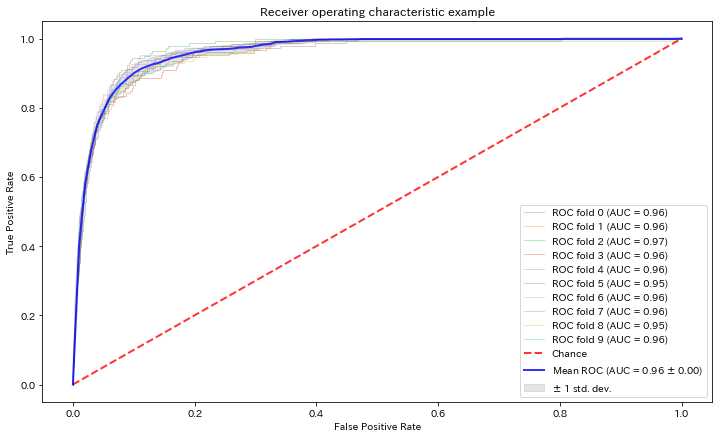

In [311]:
model = classification_and_roc_analysis(k=3, classifier=classifier,
                                                          X_train=X_train,
                                                          y_train=y_train,
                                                          visualize=True)[1]

In [312]:
feature_name_table["importance"] = model.feature_importances_.tolist()

In [313]:
feature_name_table.sort_values(by=["importance"], ascending=False)

,name,genuine_name,importance
190,V190,dummy_age_type_b_75歳以上,22
422,V422,dummy_airbag_equipment_type_b_その他,21
463,V463,気圧（海面）,21
462,V462,気圧（現地）,19
469,V469,風速,19
...,...,...,...
203,V203,dummy_parties_type_a_二輪車－自動二輪－軽二輪－126～250cc,0
201,V201,dummy_parties_type_a_二輪車－自動二輪－小型二輪－401～750ｃｃ,0
200,V200,dummy_parties_type_a_二輪車－自動二輪－小型二輪－251～400cc,0
199,V199,dummy_parties_type_a_二輪車－自動二輪－原付二種－51～125cc,0


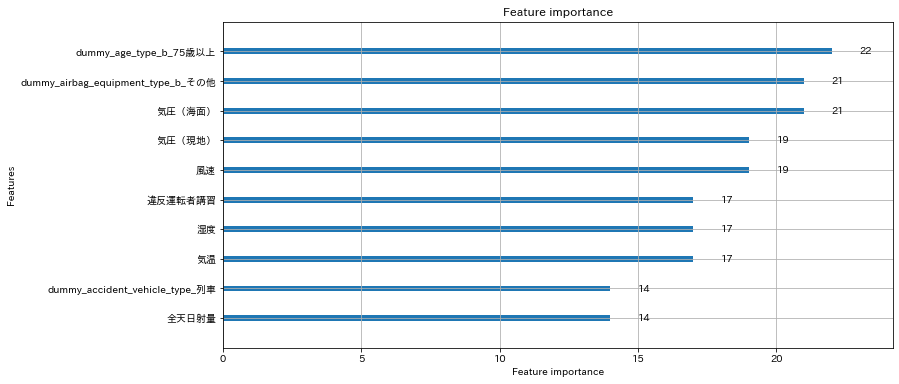

In [314]:
import japanize_matplotlib
lgb.plot_importance(model, figsize=(12, 6),max_num_features=10).set_yticklabels(list(feature_name_table.sort_values(by=["importance"], ascending=False).head(10)['genuine_name'].astype(str))[::-1])
plt.show()

In [315]:
feature_name_table.sort_values(by=["importance"], ascending=False).head(20)

,name,genuine_name,importance
190,V190,dummy_age_type_b_75歳以上,22
422,V422,dummy_airbag_equipment_type_b_その他,21
463,V463,気圧（海面）,21
462,V462,気圧（現地）,19
469,V469,風速,19
455,V455,違反運転者講習,17
468,V468,湿度,17
465,V465,気温,17
169,V169,dummy_accident_vehicle_type_列車,14
471,V471,全天日射量,14


[[102904  10143]
 [   121    817]]
正答率:  0.909953063999649
誤答率:  0.09004693600035096
再現率:  0.8710021321961621
適合率:  0.07454379562043796
F値:  0.13733400571524626
fbeta_score:  0.07522485318222179


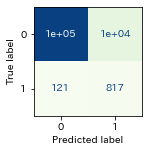

In [342]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score
import seaborn as sns

y_pred_test_ = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred_test_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(2,2))
disp.plot(cmap='GnBu',colorbar=False,ax=ax)
print(confusion_matrix)

accuracy_score = accuracy_score(y_test, y_pred_test_)
error_rate = 1 - accuracy_score
print('正答率: ',accuracy_score)
print('誤答率: ',error_rate)

recall_score = recall_score(y_test, y_pred_test_)
precision_score = precision_score(y_test, y_pred_test_)
print('再現率: ',recall_score)
print('適合率: ',precision_score)

f1_score = f1_score(y_test, y_pred_test_)
fbeta_score = fbeta_score(y_test, y_pred_test_, beta=0.1)
print('F値: ',f1_score)
print('fbeta_score: ',fbeta_score)

In [317]:
test_teacher_flag = test_df.death_flag

In [318]:
test_teacher_flag.shape

(267112,)

In [319]:
test_columns = ['genuine_pref_name', 'road_type', 'road_bypass', 'road_updown_type',
       'day_night_type', 'weather_type', 'terrain_type', 'road_condition_type',
       'road_shape_type', 'roundabout_diameter_type', 'traffic_lights_type',
       'pause_sign_type_a', 'pause_sign_type_b', 'pause_display_type_a',
       'pause_display_type_b', 'road_width_type', 'road_alignment_type',
       'zone_regulation_type', 'pedestrian_road_division_type',
       'accident_vehicle_type', 'age_type_a', 'age_type_b', 'parties_type_a',
       'parties_type_b', 'use_type_a', 'use_type_b', 'vehicle_shape_type_a',
       'vehicle_shape_type_b', 'speed_regulation_type_a',
       'speed_regulation_type_b', 'collision_site_type_a',
       'collision_site_type_b', 'damage_to_vehicle_type_a',
       'damage_to_vehicle_type_b', 'airbag_equipment_type_a',
       'airbag_equipment_type_b', 'side_airbag_equipment_type_a',
       'side_airbag_equipment_type_b', 'weekday_type', 'holiday_type', 'death_flag',
       '停止処分者講習実施状況', '初回更新者講習', '違反運転者講習', '一般運転者講習', '優良運転者講習', '認知機能検査受検者数',
       '高齢者講習受講者数', '臨時認知機能検査受検者数', '臨時高齢者講習受講者数', '気圧（現地）',
       '気圧（海面）', '降水量', '気温', '露点湿度', '蒸気圧', '湿度', '風速', '日照時間', '全天日射量',
       '降雪', '積雪'
                ]

test_df = test_df[test_columns]

In [320]:
# 一気にカテゴリ化
cols = test_columns[:-22]
test_df[cols] = test_df[cols].astype('category')
 
# ダミー変数を一気に作る
for each_columns in cols:
    dummy_df = pd.get_dummies(test_df[each_columns], drop_first= False)
    dummy_df.columns =  ["dummy_" + each_columns + "_" + str(i) for i in dummy_df.columns.tolist()]
    
    test_df = pd.concat([test_df,
                                     dummy_df], axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [321]:
test_df

,genuine_pref_name,road_type,road_bypass,road_updown_type,day_night_type,weather_type,terrain_type,road_condition_type,road_shape_type,roundabout_diameter_type,...,dummy_weekday_type_土,dummy_weekday_type_日,dummy_weekday_type_月,dummy_weekday_type_木,dummy_weekday_type_水,dummy_weekday_type_火,dummy_weekday_type_金,dummy_holiday_type_その他,dummy_holiday_type_前日,dummy_holiday_type_当日
0,北海道,高速自動車国道,現道区間又は包括路線,上,昼－明,曇,非市街地,舗装－凍結,単路－その他,環状交差点以外,...,0,0,1,0,0,0,0,1,0,0
1,北海道,高速自動車国道,現道区間又は包括路線,上,夜－明,晴,非市街地,舗装－乾燥,単路－その他,環状交差点以外,...,0,0,0,1,0,0,0,1,0,0
2,北海道,高速自動車国道,現道区間又は包括路線,上,夜－明,雪,非市街地,舗装－凍結,単路－その他,環状交差点以外,...,0,1,0,0,0,0,0,1,0,0
3,北海道,高速自動車国道,現道区間又は包括路線,上,昼－昼,雪,非市街地,舗装－凍結,単路－トンネル,環状交差点以外,...,0,0,0,0,0,0,1,1,0,0
4,北海道,一般国道（国道番号）,現道区間又は包括路線,対象外,昼－昼,雪,市街地－人口集中,舗装－積雪,交差点－その他,環状交差点以外,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267107,大分,一般都道府県道,現道区間又は包括路線,下,夜－夜,晴,市街地－人口集中,舗装－乾燥,交差点－その他,環状交差点以外,...,0,0,0,0,0,0,1,1,0,0
267108,大分,一般都道府県道,現道区間又は包括路線,対象外,夜－夜,晴,市街地－人口集中,舗装－乾燥,単路－その他,環状交差点以外,...,0,0,0,0,0,0,1,1,0,0
267109,大分,一般市町村道,現道区間又は包括路線,対象外,夜－暮,晴,市街地－その他,舗装－乾燥,交差点付近－その他,環状交差点以外,...,0,0,0,0,0,0,1,1,0,0
267110,大分,一般市町村道,現道区間又は包括路線,対象外,昼－昼,晴,市街地－人口集中,舗装－乾燥,単路－カーブ・屈折,環状交差点以外,...,0,0,0,0,1,0,0,1,0,0


In [322]:
test_df.shape

(267112, 515)

In [323]:
test_dataset = pd.concat([
                                test_df.filter(regex="dummy_genuine_pref_name"),
                                test_df.filter(regex="dummy_weekday_type"),
                                test_df.filter(regex="dummy_holiday_type"),
                                test_df.filter(regex="dummy_pref_name"),
                                test_df.filter(regex="dummy_road_type"),
                                test_df.filter(regex="dummy_road_bypass"),
                                test_df.filter(regex="dummy_road_updown_type"),
                                test_df.filter(regex="dummy_day_night_type"),
                                test_df.filter(regex="dummy_weather_type"),
                                test_df.filter(regex="dummy_terrain_type"),
                                test_df.filter(regex="dummy_road_condition_type"),
                                test_df.filter(regex="dummy_road_shape_type"),
                                test_df.filter(regex='dummy_roundabout_diameter_type'),
                                test_df.filter(regex="dummy_traffic_lights_type"),
                                test_df.filter(regex="dummy_pause_sign_type_a"),
                                test_df.filter(regex="dummy_pause_sign_type_b"),
                                test_df.filter(regex="dummy_pause_display_type_a"),
                                test_df.filter(regex="dummy_pause_display_type_b"),
                                test_df.filter(regex="dummy_road_width_type"),
                                test_df.filter(regex="dummy_road_alignment_type"),
                                test_df.filter(regex="dummy_zone_regulation_type"),
                                test_df.filter(regex="dummy_accident_vehicle_type"),
                                test_df.filter(regex="dummy_pedestrian_road_division_type"),
                                test_df.filter(regex="dummy_age_type_a"),
                                test_df.filter(regex="dummy_age_type_b"),
                                test_df.filter(regex="dummy_parties_type_a"),
                                test_df.filter(regex="dummy_parties_type_b"),
                                test_df.filter(regex="dummy_use_type_a"),
                                test_df.filter(regex="dummy_use_type_b"),
                                test_df.filter(regex="dummy_vehicle_shape_type_a"),
                                test_df.filter(regex="dummy_vehicle_shape_type_b"),
                                test_df.filter(regex="dummy_collision_site_type_a"),
                                test_df.filter(regex="dummy_collision_site_type_b"),
                                test_df.filter(regex="dummy_damage_to_vehicle_type_a"),
                                test_df.filter(regex="dummy_damage_to_vehicle_type_b"),
                                test_df.filter(regex="dummy_airbag_equipment_type_a"),
                                test_df.filter(regex="dummy_airbag_equipment_type_b"),
                                test_df.filter(regex="dummy_side_airbag_equipment_type_a"),
                                test_df.filter(regex="dummy_side_airbag_equipment_type_b"),
                                test_df.filter(regex="dummy_speed_regulation_type_a"),
                                test_df.filter(regex="dummy_speed_regulation_type_b"),
                                test_df["停止処分者講習実施状況"],
                                test_df["初回更新者講習"],
                                test_df["違反運転者講習"],
                                test_df["一般運転者講習"],
                                test_df["優良運転者講習"],
                                test_df["認知機能検査受検者数"],
                                test_df["高齢者講習受講者数"],
                                test_df["臨時認知機能検査受検者数"],
                                test_df["臨時高齢者講習受講者数"],
                                test_df["気圧（現地）"],
                                test_df["気圧（海面）"],
                                test_df["降水量"],
                                test_df["気温"],
                                test_df["露点湿度"],
                                test_df["蒸気圧"],
                                test_df["湿度"],
                                test_df["風速"],
                                test_df["日照時間"],
                                test_df["全天日射量"],
                                test_df["降雪"],
                                test_df["積雪"],
                      ], axis=1)

In [324]:
test_dataset = test_dataset.fillna(-1)

In [325]:
test_dataset.isnull().any().sum()

0

In [326]:
# 訓練データの列名を残しておく
train_column_list = feature_name_table.genuine_name.tolist()
#train_column_list.extend(["third_mesh"])

# 訓練データにはあるが、テストデータにはない変数を0で生成させる
compensate_list = list(set(train_column_list) - set(test_dataset.columns))
if compensate_list != []:
    for each_column in compensate_list:
        test_dataset[each_column] = 0.0

test_dataset = test_dataset[train_column_list]

In [327]:
test_X = test_dataset

# 変数名をv[0-9]に変更する
test_X.columns = [ 'V' + str(i) for i in range(len(test_X.columns.tolist()))]

In [328]:
y_pred_test_proba = model.predict_proba(test_X)
y_pred_test = model.predict(test_X)

In [329]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# 後でデータの型を指定しておく
def GroupbyPlot(df:pd.DataFrame,
                             group:str,
                             target:str,
                             y_label:str,
                             x_label:str):
    group_name_summary = df.groupby(group)[target].agg([np.mean, "count"])    
    group_name_summary = group_name_summary.reset_index()
    group_name_summary = group_name_summary.sort_values(by="mean", ascending=False).reset_index(drop=True)
    index_list = group_name_summary[group].tolist()

    
    fig, ax = plt.subplots(figsize=(13,5))
    ax3 = ax.twinx()
    rspine = ax3.spines['right'] 
    rspine.set_position(('axes', 1.15))
    ax3.set_frame_on(True)
    ax3.patch.set_visible(False)
    fig.subplots_adjust(right=0.7)
    group_name_summary["mean"].plot(ax=ax, style='r-', kind="line")
    group_name_summary["count"].plot(ax=ax, secondary_y=True,kind="bar",color='b',alpha=0.5 );
    # ax.set_title('');
    ax.set_ylabel(y_label);
    ax.set_xlabel(x_label); 
    ax.set_xticklabels(index_list);
    ax3.set_ylabel('count');
    ax.grid()
    return group_name_summary

In [330]:
y_pred_test.shape

(267112,)

In [331]:
from sklearn.metrics import average_precision_score, roc_auc_score

print(average_precision_score(test_teacher_flag, y_pred_test_proba[:,1]))
print(roc_auc_score(test_teacher_flag, y_pred_test_proba[:,1]))

0.24344921593288749
0.9560799434961295


[[239835  24813]
 [   314   2150]]
正答率:  0.9059308454880349
誤答率:  0.09406915451196507
再現率:  0.872564935064935
適合率:  0.07973890145755294
F値:  0.14612430760865872
fbeta_score:  0.08046275998938773


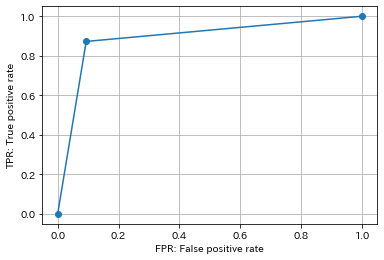

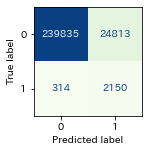

In [346]:
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score, plot_confusion_matrix

fpr, tpr, thresholds = roc_curve(test_teacher_flag, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
#plt.savefig('画像/roc_curve.png')

confusion_matrix = confusion_matrix(test_teacher_flag, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(2,2))
disp.plot(cmap='GnBu',colorbar=False,ax=ax)
print(confusion_matrix)

accuracy_score = accuracy_score(test_teacher_flag, y_pred_test)
error_rate = 1 - accuracy_score
print('正答率: ',accuracy_score)
print('誤答率: ',error_rate)

recall_score = recall_score(test_teacher_flag, y_pred_test)
precision_score = precision_score(test_teacher_flag, y_pred_test)
print('再現率: ',recall_score)
print('適合率: ',precision_score)

f1_score = f1_score(test_teacher_flag, y_pred_test)
fbeta_score = fbeta_score(test_teacher_flag, y_pred_test, beta=0.1)
print('F値: ',f1_score)
print('fbeta_score: ',fbeta_score)

#yが実測、xが予測
#

In [344]:
from sklearn.metrics import classification_report

print(classification_report(test_teacher_flag, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    264648
           1       0.08      0.87      0.15      2464

    accuracy                           0.91    267112
   macro avg       0.54      0.89      0.55    267112
weighted avg       0.99      0.91      0.94    267112



In [333]:
result_df = pd.DataFrame(y_pred_test_proba[:,1], columns=["pred_value"])

result_df["death_flag"] = test_teacher_flag.values
result_df["prefecture"] = test_df.genuine_pref_name

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels=["0~", "1~", "2~","3~","4~","5~", "6~", "7~", "8~", "9~"]

result_df['pred_bins'] = pd.cut(result_df['pred_value'], 
                                             bins=bins,
                                             labels=labels,
                                             include_lowest=True)

In [334]:
result_df.sort_values(by="pred_value", ascending=False).head(20)

,pred_value,death_flag,prefecture,pred_bins
41310,0.995391,0,兵庫,9~
196293,0.994848,0,新潟,9~
208544,0.994401,1,福岡,9~
60608,0.994268,1,石川,9~
206974,0.994129,1,山口,9~
212357,0.994107,1,青森,9~
211456,0.994023,1,沖縄,9~
95302,0.993876,0,北海道,9~
213191,0.993766,0,秋田,9~
94824,0.993659,0,鹿児島,9~


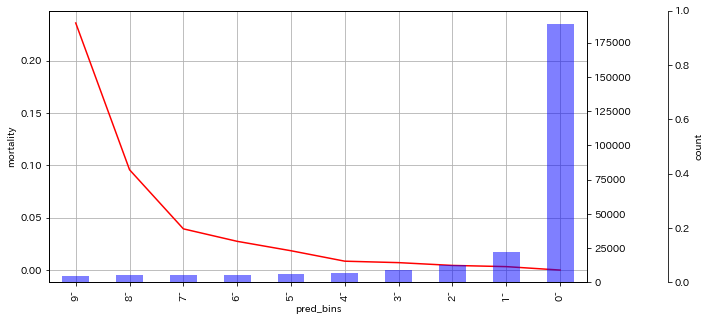

In [335]:
target_string = 'pred_bins'
df_summary = GroupbyPlot(df=result_df, 
                         group=target_string,
                         target="death_flag", y_label="mortality", x_label=target_string)

In [336]:
df_summary

,pred_bins,mean,count
0,9~,0.235785,5030
1,8~,0.095872,5184
2,7~,0.039541,5058
3,6~,0.027650,5425
4,5~,0.018672,6266
5,4~,0.008719,7111
6,3~,0.007342,8853
7,2~,0.004682,12816
8,1~,0.003534,22353
9,0~,0.000254,189016


In [337]:
list(feature_name_table.sort_values(by=["importance"], ascending=False).head(10)['genuine_name'].astype(str))

['dummy_age_type_b_75歳以上',
 'dummy_airbag_equipment_type_b_その他',
 '気圧（海面）',
 '気圧（現地）',
 '風速',
 '違反運転者講習',
 '湿度',
 '気温',
 'dummy_accident_vehicle_type_列車',
 '全天日射量']

In [347]:
feature_name_table.sort_values(by=["importance"], ascending=False).head(50)[['genuine_name', 'importance']]

,genuine_name,importance
190,dummy_age_type_b_75歳以上,22
422,dummy_airbag_equipment_type_b_その他,21
463,気圧（海面）,21
462,気圧（現地）,19
469,風速,19
455,違反運転者講習,17
468,湿度,17
465,気温,17
169,dummy_accident_vehicle_type_列車,14
471,全天日射量,14


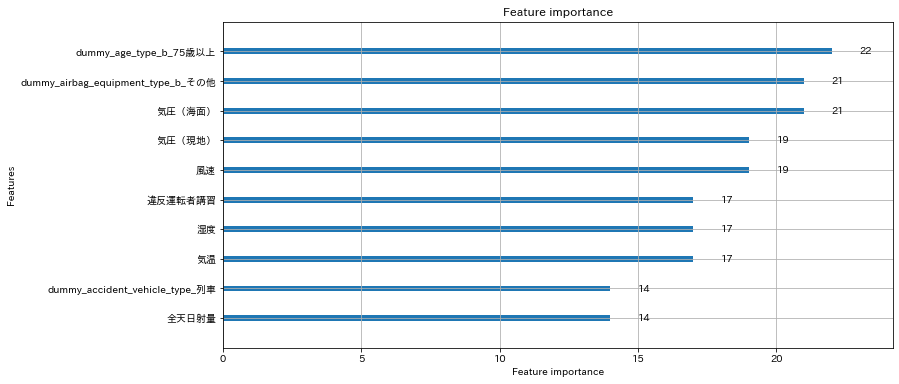

In [339]:
import japanize_matplotlib
lgb.plot_importance(model, figsize=(12, 6),max_num_features=10).set_yticklabels(list(feature_name_table.sort_values(by=["importance"], ascending=False).head(10)['genuine_name'].astype(str))[::-1])
plt.show()